In [1]:
import os
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

def read_data(filename):
    """Reads DEAP .mat file and returns the loaded dictionary."""
    data = loadmat(filename)
    return data

# Generate list of file names
files = [f"s{n:02d}.mat" for n in range(1, 33)]
print(files)

# Full file paths
file_paths = [os.path.join(data_folder, f) for f in files]

# Example: load first file
for path in file_paths:
    if os.path.isfile(path):
        print(f"Loading {path}")
        mat_data = read_data(path)
        print(f"  Keys: {mat_data.keys()}")
    else:
        print(f"File not found: {path}")


['s01.mat', 's02.mat', 's03.mat', 's04.mat', 's05.mat', 's06.mat', 's07.mat', 's08.mat', 's09.mat', 's10.mat', 's11.mat', 's12.mat', 's13.mat', 's14.mat', 's15.mat', 's16.mat', 's17.mat', 's18.mat', 's19.mat', 's20.mat', 's21.mat', 's22.mat', 's23.mat', 's24.mat', 's25.mat', 's26.mat', 's27.mat', 's28.mat', 's29.mat', 's30.mat', 's31.mat', 's32.mat']
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s01.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s02.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s03.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s04.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'l

In [2]:
import os
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

# List of filenames (s01.mat to s32.mat)
files = [f"{n:02d}" for n in range(1, 33)]

labels = []
data = []

for i in files:
    file_path = os.path.join(data_folder, f"s{i}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    # Load .mat file
    d = loadmat(file_path)
    
    # Append labels and data
    labels.append(d['labels'])
    data.append(d['data'])

print(f"Loaded {len(data)} files successfully.")


Loaded 32 files successfully.


In [3]:
import os
import numpy as np
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

labels = []
data = []

# Load all 32 subjects
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    d = loadmat(file_path)
    labels.append(d['labels'])  # (40, 4)
    data.append(d['data'])      # (40, 40, 8064)

# Convert lists to arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

print("Original shapes:")
print(labels.shape)  # (32, 40, 4)
print(data.shape)    # (32, 40, 40, 8064)

# Reshape to combine users & trials
labels = labels.reshape(1280, 4)         # (1280, 4)
data = data.reshape(1280, 40, 8064)      # (1280, 40, 8064)

print("After reshape:")
print(labels.shape)  # (1280, 4)
print(data.shape)    # (1280, 40, 8064)

# Extract only EEG channels (first 32 channels)
eeg_data = data[:, :32, :]  # (1280, 32, 8064)
print("EEG data shape:")
print(eeg_data.shape)       # (1280, 32, 8064)


Original shapes:
(32, 40, 4)
(32, 40, 40, 8064)
After reshape:
(1280, 4)
(1280, 40, 8064)
EEG data shape:
(1280, 32, 8064)


In [4]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

labels = []
data = []

# Load all 32 subjects
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    d = loadmat(file_path)
    labels.append(d['labels'])  # (40, 4)
    data.append(d['data'])      # (40, 40, 8064)

# Convert lists to arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

# Reshape
labels = labels.reshape(1280, 4)         # (1280, 4)
data = data.reshape(1280, 40, 8064)      # (1280, 40, 8064)

# Extract EEG channels (first 32)
eeg_data = data[:, :32, :]               # (1280, 32, 8064)

# Create DataFrame for labels
df_label = pd.DataFrame({
    'Valence': labels[:, 0],
    'Arousal': labels[:, 1],
    'Dominance': labels[:, 2],
    'Liking': labels[:, 3]
})

print(df_label.head())


   Valence  Arousal  Dominance  Liking
0     7.71     7.60       6.90    7.83
1     8.10     7.31       7.28    8.47
2     8.58     7.54       9.00    7.08
3     4.94     6.01       6.12    8.06
4     6.96     3.92       7.19    6.05


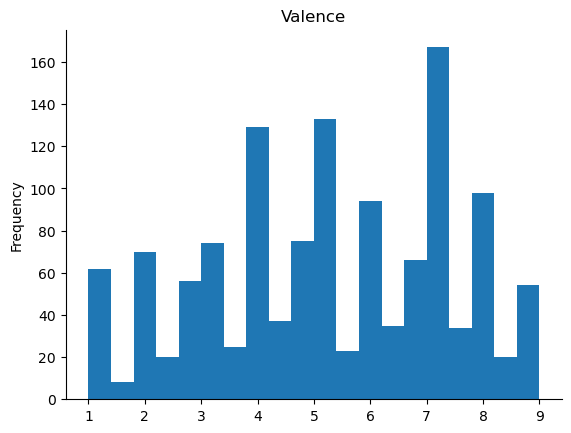

In [6]:
from matplotlib import pyplot as plt
df_label['Valence'].plot(kind='hist', bins=20, title='Valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

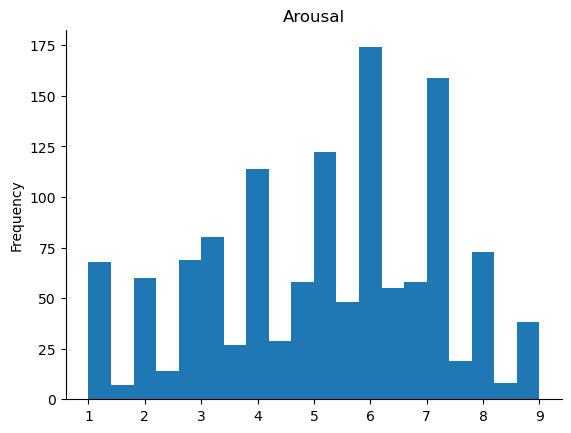

In [7]:
from matplotlib import pyplot as plt
df_label['Arousal'].plot(kind='hist', bins=20, title='Arousal')
plt.gca().spines[['top', 'right',]].set_visible(False)

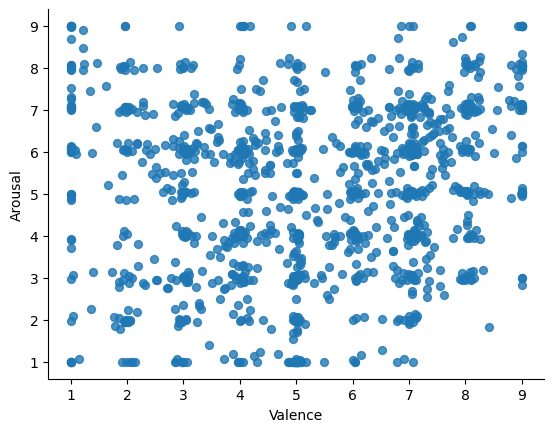

In [8]:
from matplotlib import pyplot as plt
df_label.plot(kind='scatter', x='Valence', y='Arousal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

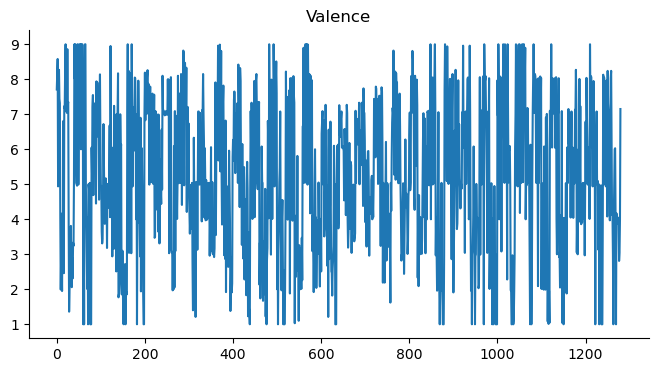

In [9]:
from matplotlib import pyplot as plt
df_label['Valence'].plot(kind='line', figsize=(8, 4), title='Valence')
plt.gca().spines[['top', 'right']].set_visible(False)

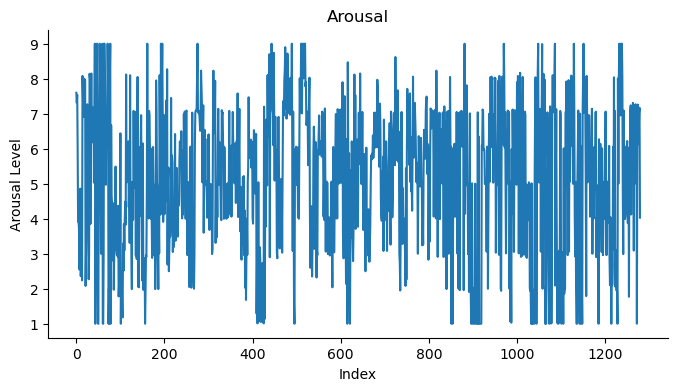

In [10]:
from matplotlib import pyplot as plt

# Assuming df_label is already defined and contains the 'Arousal' column
df_label['Arousal'].plot(kind='line', figsize=(8, 4), title='Arousal')
plt.xlabel('Index')  # Add a label to the x-axis
plt.ylabel('Arousal Level')  # Add a label to the y-axis
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [11]:
df_label.describe()

,Valence,Arousal,Dominance,Liking
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,5.254313,5.156711,5.382750,5.518133
std,2.130816,2.020499,2.096321,2.282780
min,1.000000,1.000000,1.000000,1.000000
25%,3.867500,3.762500,3.932500,3.960000
50%,5.040000,5.230000,5.240000,6.050000
75%,7.050000,6.950000,7.040000,7.090000
max,9.000000,9.000000,9.000000,9.000000


In [12]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valence    1280 non-null   float64
 1   Arousal    1280 non-null   float64
 2   Dominance  1280 non-null   float64
 3   Liking     1280 non-null   float64
dtypes: float64(4)
memory usage: 40.1 KB


In [13]:
label_name = ["valence","arousal","dominance","liking"]
labels_valence = []
labels_arousal = []
labels_dominance = []
labels_liking = []
for la in labels:
    l = []
    if la[0]>5:
        labels_valence.append(1)
    else:
        labels_valence.append(0)
    if la[1]>5:
        labels_arousal.append(1)
    else:
        labels_arousal.append(0)
    if la[2]>5:
        labels_dominance.append(1)
    else:
        labels_dominance.append(0)
    if la[3]>6:
        labels_liking.append(1)
    else:
        labels_liking.append(0)

In [14]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(eeg_data[people,channel], 128, bd)

In [15]:
eeg_band = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_band.append(get_band_power(i,j,"delta"))
        eeg_band.append(get_band_power(i,j,"theta"))
        eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))

/var/folders/vq/zb4tsz1149z_01624_vx5k700000gn/T/ipykernel_2113/322418473.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  bp = simps(psd[idx_band], dx=freq_res)


In [16]:
eeg_band = np.array(eeg_band)
eeg_band = eeg_band.reshape((1280,160)) # 5×32
print(eeg_band.shape)
np.save("eeg_band.npy", eeg_band)
eeg_band = np.load("eeg_band.npy")
print(eeg_band.shape)

(1280, 160)
(1280, 160)


In [17]:
data_x = eeg_band
print(data_x.shape)

# label_y = labels_valence
label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking
trainscores = []
testscores = []
X = data_x
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
X = preprocessing.normalize(X, norm='l1')
print(X.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=1000)
X=pca.fit_transform(X)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label_y)

(1280, 160)
(1280, 13041)
(1280, 1000)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train,)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

train_score： 0.7114583333333333
test_score： 0.61875


In [19]:
X = data_x
from sklearn import preprocessing

# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X=pca.fit_transform(X)
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=20,min_samples_split=4)
dtree = dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

(1280, 160)
(1280, 100)
train_score： 0.9885416666666667
test_score： 0.6


In [20]:
X = data_x
from sklearn import preprocessing

# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)


from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=5)
rf=rf.fit(X_train, y_train)
train_score=rf.score(X_train,y_train)
test_score=rf.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

(1280, 160)
train_score： 0.996875
test_score： 0.584375


In [21]:
X = data_x
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# min_max_scaler = preprocessing.MinMaxScaler()
# X=min_max_scaler.fit_transform(X)
X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l2')
print(X.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C = 0.1)
svc.fit(X_train, y_train)
train_score=svc.score(X_train,y_train)
test_score=svc.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(1280, 13041)
train_score： 0.5614583333333333
test_score： 0.61875


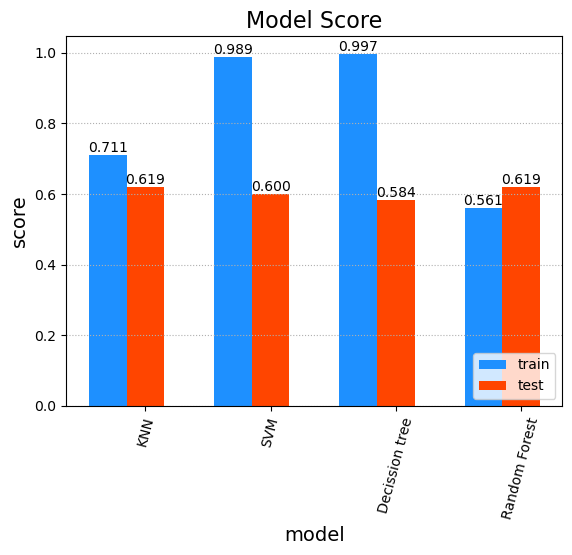

In [23]:
model_name = ["KNN","SVM","Decission tree","Random Forest"]
import matplotlib.pyplot as plt
plt.title('Model Score', fontsize=16)
plt.xlabel('model', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(4)
a = plt.bar(x - 0.3, trainscores, 0.3, color='dodgerblue', label='train', align='center')
b = plt.bar(x, testscores, 0.3, color='orangered', label='test', align='center')
# Set up labels
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')
plt.xticks(x,model_name,rotation=75)
plt.legend(loc='lower right')
plt.show()

In [24]:
# Hjorth parameters calculation
def hjorth_parameters(data):
    first_deriv = np.diff(data)
    second_deriv = np.diff(first_deriv)
    var_zero = np.var(data)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)
    
    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt((var_d2 / var_d1) / mobility)
    
    return activity, mobility, complexity

# Get Hjorth features
eeg_hjorth = []
for i in range(len(eeg_data)):
    for j in range(len(eeg_data[0])):
        activity, mobility, complexity = hjorth_parameters(eeg_data[i, j])
        eeg_hjorth.extend([activity, mobility, complexity])

eeg_hjorth = np.array(eeg_hjorth)
eeg_hjorth = eeg_hjorth.reshape((1280, 96)) # 3 features * 32 channels
print(eeg_hjorth.shape)

# Prepare the labels
df_label = pd.DataFrame({'Valence': labels[:,0], 'Arousal': labels[:,1],
                         'Dominance': labels[:,2], 'Liking': labels[:,3]})



data_x = eeg_hjorth
print(data_x.shape)

label_y = labels_arousal

# Save the Hjorth features and labels to a CSV for future use
df_features = pd.DataFrame(data_x)
df_labels = pd.DataFrame({'Valence': labels_valence, 'Arousal': labels_arousal,
                          'Dominance': labels_dominance, 'Liking': labels_liking})

df_features.to_csv('hjorth_features.csv', index=False)
df_labels.to_csv('hjorth_labels.csv', index=False)

(1280, 96)
(1280, 96)


In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load Hjorth features and labels from CSV
hjorth_features = pd.read_csv('hjorth_features.csv')
hjorth_labels = pd.read_csv('hjorth_labels.csv')

# Convert to numpy arrays
data_x = hjorth_features.to_numpy()
labels_valence = hjorth_labels['Valence'].to_numpy()
labels_arousal = hjorth_labels['Arousal'].to_numpy()
labels_dominance = hjorth_labels['Dominance'].to_numpy()
labels_liking = hjorth_labels['Liking'].to_numpy()

print(data_x.shape)

# Select the label you want to use for training
label_y = labels_valence
#label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking

trainscores = []
testscores = []


# Select the label you want to use for training
# label_y = labels_valence
label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking

trainscores = []
testscores = []

# KNN training with Hjorth features
X = data_x

# Polynomial feature transformation
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# Scaling and normalization
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# X = preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# Dimensionality reduction (if necessary)
pca = PCA(n_components=100)
X = pca.fit_transform(X)
print(X.shape)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.2, random_state=42)

(1280, 96)
(1280, 4753)
(1280, 100)


In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("train_score:", train_score)
print("test_score:", test_score)

# Store the scores
trainscores.append(train_score)
testscores.append(test_score)

train_score: 0.7294921875
test_score: 0.5859375


In [28]:
dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=4)
dtree.fit(X_train, y_train)
train_score = dtree.score(X_train, y_train)
test_score = dtree.score(X_test, y_test)
print("Decision Tree - train_score:", train_score)
print("Decision Tree - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

Decision Tree - train_score: 0.9921875
Decision Tree - test_score: 0.55859375


In [29]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Random Forest - train_score:", train_score)
print("Random Forest - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

Random Forest - train_score: 0.9990234375
Random Forest - test_score: 0.6015625


In [30]:
# SVM Classifier
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X_train, y_train)
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
print("SVM - train_score:", train_score)
print("SVM - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

SVM - train_score: 0.57421875
SVM - test_score: 0.58203125


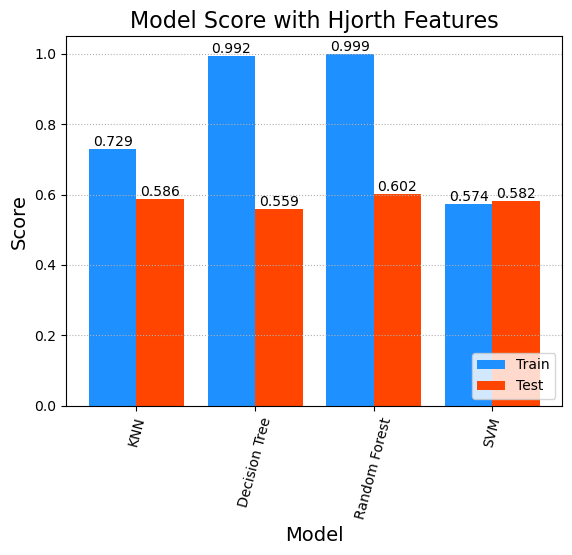

In [31]:
# Plot the results
model_name = ["KNN", "Decision Tree", "Random Forest", "SVM"]
plt.title('Model Score with Hjorth Features', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(len(model_name))
a = plt.bar(x - 0.2, trainscores, 0.4, color='dodgerblue', label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, color='orangered', label='Test', align='center')

# Set up labels
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')

plt.xticks(x, model_name, rotation=75)
plt.legend(loc='lower right')
plt.show()

Shape after scaling: (1280, 13041)
Shape after PCA: (1280, 100)


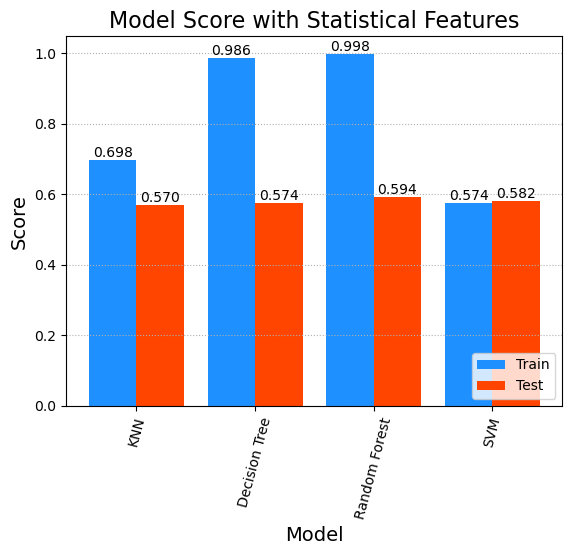

In [32]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Path to DEAP dataset
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

# Load data from .mat files
labels = []
data = []
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    d = loadmat(file_path)
    labels.append(d['labels'])  # shape (40, 4)
    data.append(d['data'])      # shape (40, 40, 8064)

# Convert to numpy arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

# Reshape to combine all subjects/trials
labels = labels.reshape(1280, 4)       # (1280, 4)
data = data.reshape(1280, 40, 8064)    # (1280, 40, 8064)

# Use only EEG channels (first 32)
eeg_data = data[:, :32, :]             # (1280, 32, 8064)

# Function to compute statistical features
def compute_statistical_features(eeg_data):
    features = []
    for trial in eeg_data:
        trial_features = []
        for channel_data in trial:
            mean_val = np.mean(channel_data)
            std_val = np.std(channel_data)
            skew_val = skew(channel_data)
            var_val = np.var(channel_data)
            kurt_val = kurtosis(channel_data)
            trial_features.extend([mean_val, std_val, skew_val, var_val, kurt_val])
        features.append(trial_features)
    return np.array(features)

# Extract statistical features
statistical_features = compute_statistical_features(eeg_data)

# Choose label (example: arousal)
labels_arousal = labels[:, 1]

# Convert continuous labels to binary categories
def binarize_labels(labels, threshold):
    return (labels > threshold).astype(int)

label_y = binarize_labels(labels_arousal, 5)

# Polynomial feature transformation
X = statistical_features
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# Scaling
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

print("Shape after scaling:", X.shape)

# Dimensionality reduction
pca = PCA(n_components=100)
X = pca.fit_transform(X)
print("Shape after PCA:", X.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.2, random_state=42)

# Store train/test scores
trainscores = []
testscores = []

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
trainscores.append(knn.score(X_train, y_train))
testscores.append(knn.score(X_test, y_test))

# Decision Tree
dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=4)
dtree.fit(X_train, y_train)
trainscores.append(dtree.score(X_train, y_train))
testscores.append(dtree.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5)
rf.fit(X_train, y_train)
trainscores.append(rf.score(X_train, y_train))
testscores.append(rf.score(X_test, y_test))

# SVM
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X_train, y_train)
trainscores.append(svc.score(X_train, y_train))
testscores.append(svc.score(X_test, y_test))

# Plot results
model_name = ["KNN", "Decision Tree", "Random Forest", "SVM"]
plt.title('Model Score with Statistical Features', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(len(model_name))
a = plt.bar(x - 0.2, trainscores, 0.4, color='dodgerblue', label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, color='orangered', label='Test', align='center')

for bar in a + b:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.3f}', ha='center', va='bottom')

plt.xticks(x, model_name, rotation=75)
plt.legend(loc='lower right')
plt.show()


In [35]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import skew, kurtosis
import os

# Path to folder with s01.mat, s02.mat, ...
DATA_PATH = "/kaggle/input/deap-dataset-mat"  # <-- change this if different

# Load .mat files
files = [f"{i:02d}" for i in range(1, 33)]
labels = []
data = []

for i in files:
    file_path = os.path.join(DATA_PATH, f"s{i}.mat")
    mat = loadmat(file_path)
    labels.append(mat['labels'])   # shape (40, 4)
    data.append(mat['data'])       # shape (40, 40, 8064)

labels = np.array(labels)  # shape (32, 40, 4)
data = np.array(data)      # shape (32, 40, 40, 8064)

# Reshape to combine subjects & trials
labels = labels.reshape(-1, 4)     # (1280, 4)
data = data.reshape(-1, 40, 8064)  # (1280, 40, 8064)

# Take only EEG channels (first 32)
eeg_data = data[:, :32, :]         # (1280, 32, 8064)

# Compute statistical features
def compute_statistical_features(eeg_data):
    features = []
    for trial in eeg_data:
        trial_features = []
        for channel_data in trial:
            mean_val = np.mean(channel_data)
            std_val = np.std(channel_data)
            skew_val = skew(channel_data)
            var_val = np.var(channel_data)
            kurt_val = kurtosis(channel_data)
            trial_features.extend([mean_val, std_val, skew_val, var_val, kurt_val])
        features.append(trial_features)
    return np.array(features)

statistical_features = compute_statistical_features(eeg_data)

# Prepare binary label (example: arousal > 5)
labels_arousal = labels[:, 1]
def binarize_labels(labels, threshold):
    return (labels > threshold).astype(int)

label_y = binarize_labels(labels_arousal, 5)

# Preprocessing
X = statistical_features
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
pca = PCA(n_components=100)
X = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, min_samples_split=4),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5),
    "SVM": SVC(kernel='rbf', C=0.1, probability=True)
}

# Train, evaluate and plot
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/deap-dataset-mat/s01.mat'